# Stock Market Prediction Using Stock Exchange Data from kaggle

## Name: <span style="color:blue"> Kyle Weston </span>

In [3]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Machine Learning models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Model evaluation
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Load the dataset
weather_data = pd.read_csv("weather_classification_data.csv")

In [5]:
# Display the first few rows
print("First five rows of the dataset:")
print(weather_data.head())

# Check for null values
print("\nNull values in the dataset:")
print(weather_data.isnull().sum())

First five rows of the dataset:
   Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4    

In [6]:
# Identify categorical and numerical columns
categorical_columns = ['Cloud Cover', 'Season', 'Location']
numerical_columns = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
                     'Atmospheric Pressure', 'UV Index', 'Visibility (km)']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # Scale numerical features
        ('cat', OneHotEncoder(), categorical_columns)  # One-hot encode categorical features
    ]
)

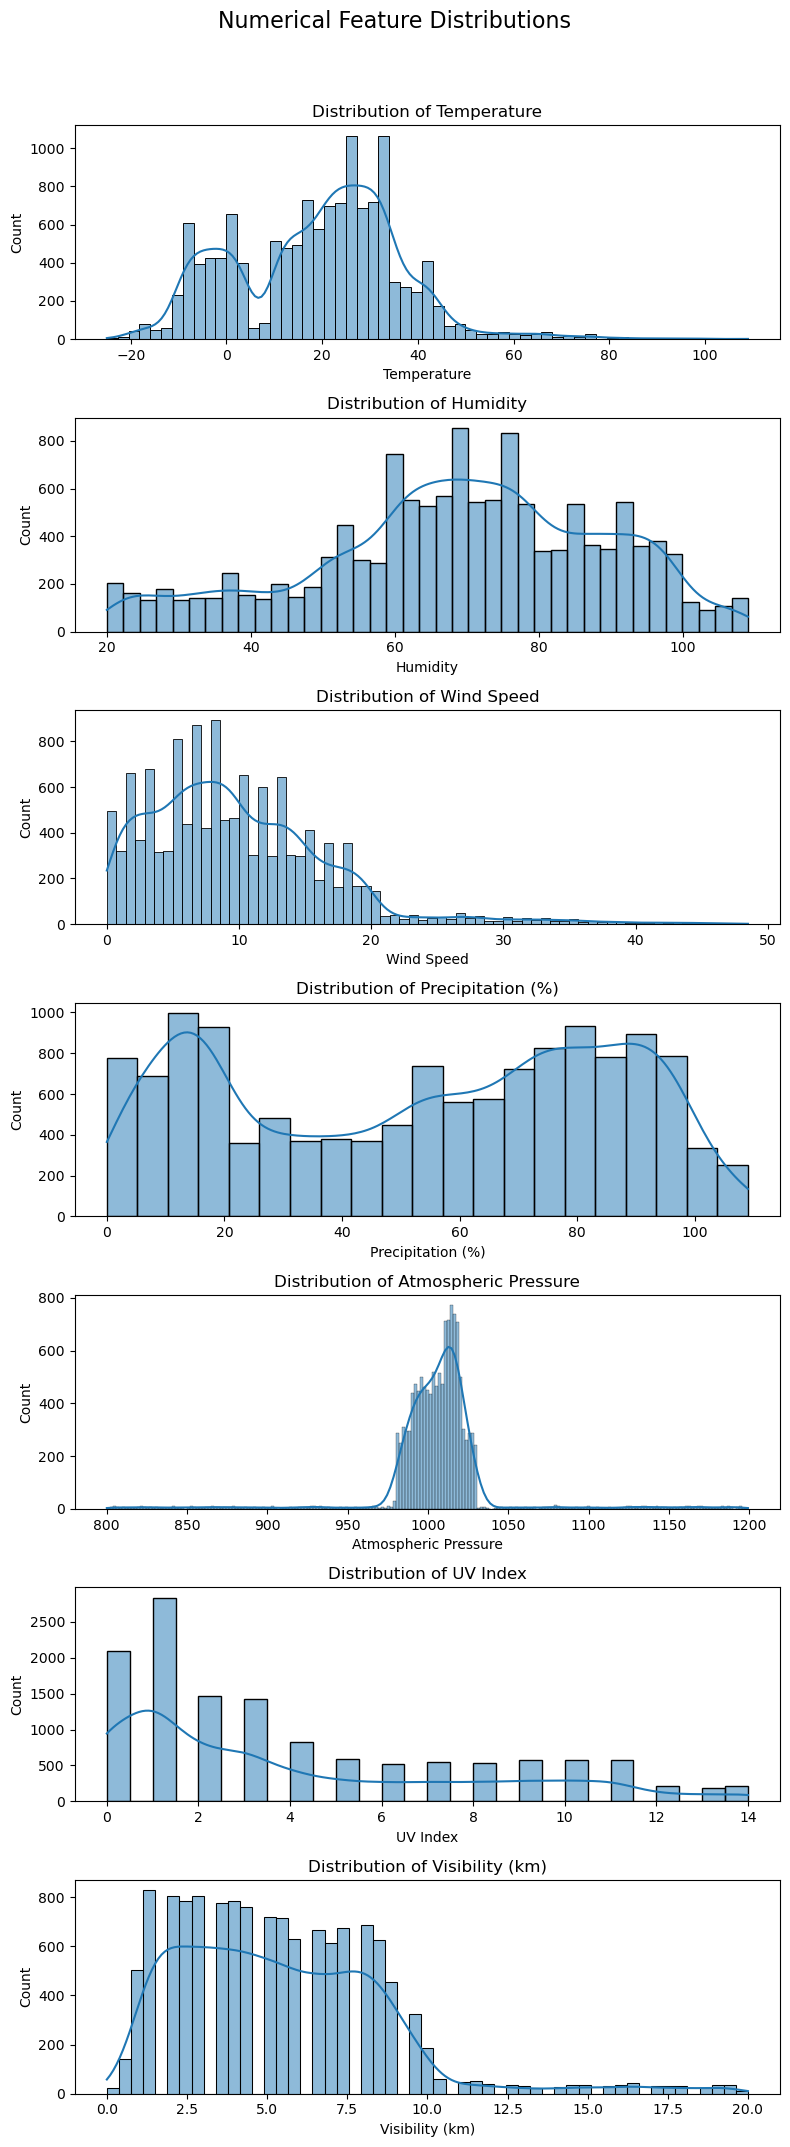

In [7]:
# Visualize the distribution of numerical features
def plot_distributions(data, columns, title="Feature Distributions"):
    fig, axes = plt.subplots(len(columns), 1, figsize=(8, len(columns) * 3))
    fig.suptitle(title, fontsize=16, y=1.02)
    for i, col in enumerate(columns):
        sns.histplot(data[col], kde=True, ax=axes[i])
        axes[i].set_title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

numerical_columns = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
                     'Atmospheric Pressure', 'UV Index', 'Visibility (km)']

plot_distributions(weather_data, numerical_columns, "Numerical Feature Distributions")

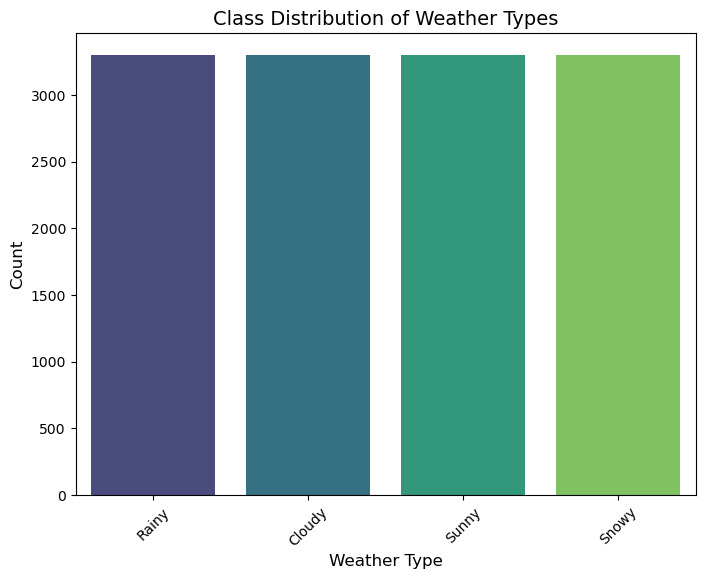

In [8]:
# Check the class distribution of the target variable
target_distribution = weather_data['Weather Type'].value_counts()

# Plot class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=target_distribution.index, y=target_distribution.values, palette="viridis", hue=target_distribution.index, dodge=False)
plt.title("Class Distribution of Weather Types", fontsize=14)
plt.xlabel("Weather Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()

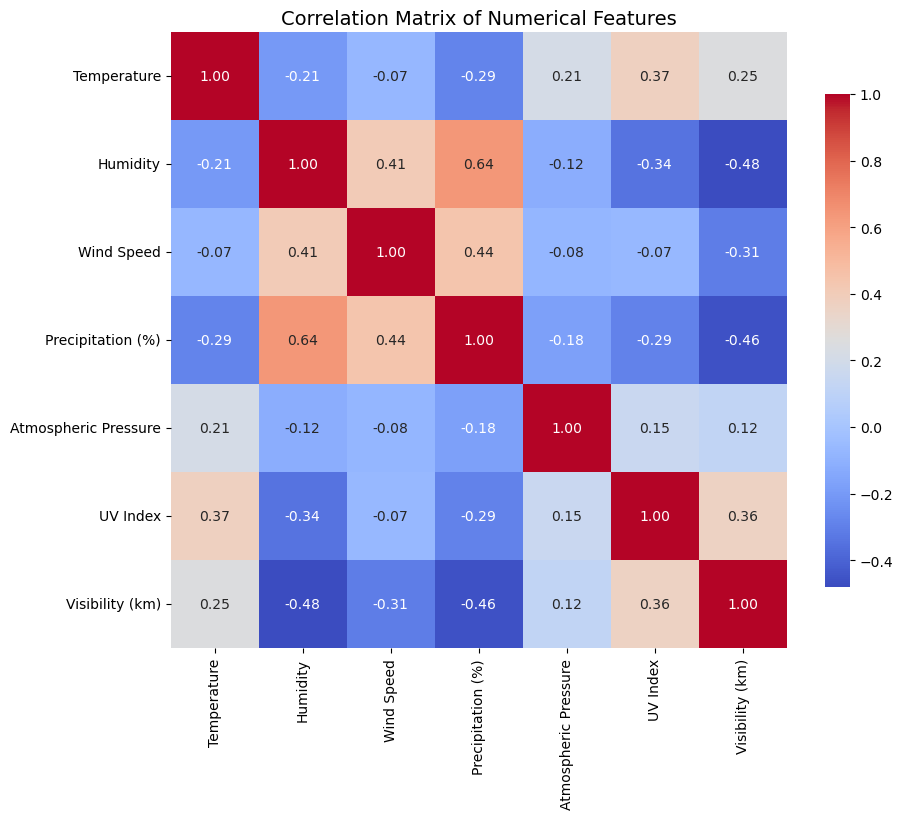

In [9]:
# Correlation Matrix
correlation_matrix = weather_data[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True, cbar_kws={'shrink': 0.8})
plt.title("Correlation Matrix of Numerical Features", fontsize=14)
plt.show()

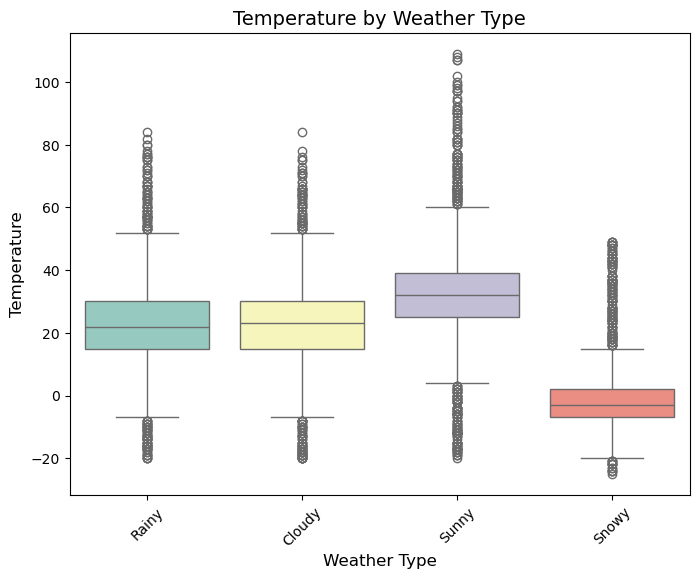

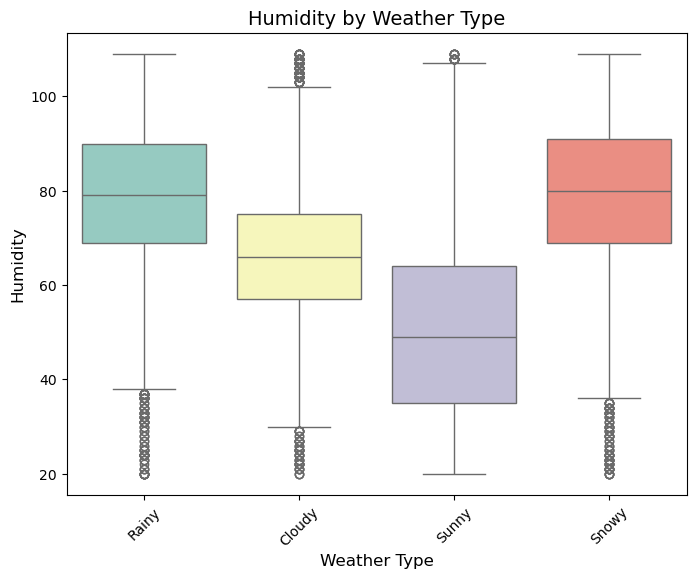

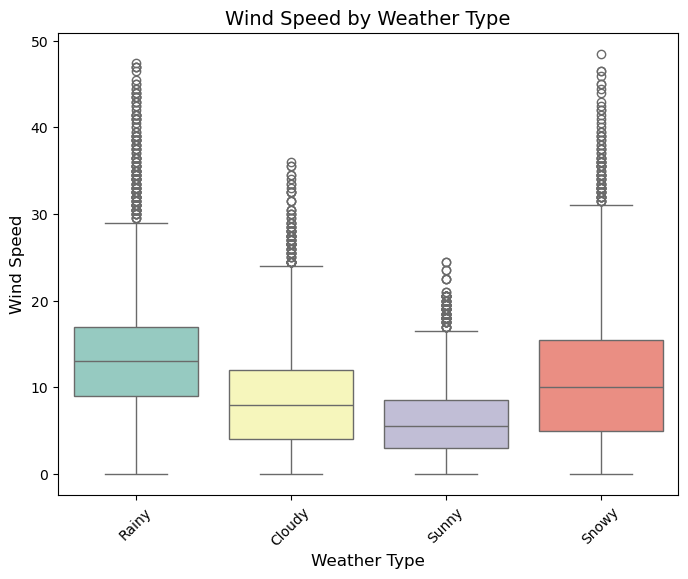

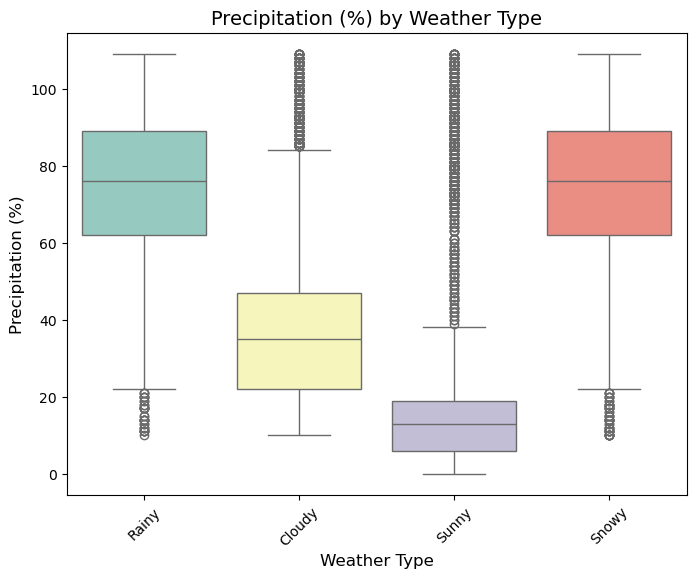

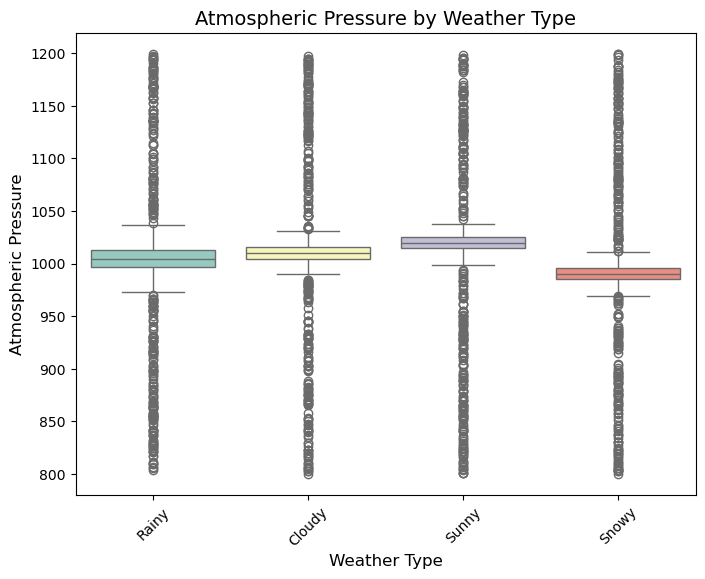

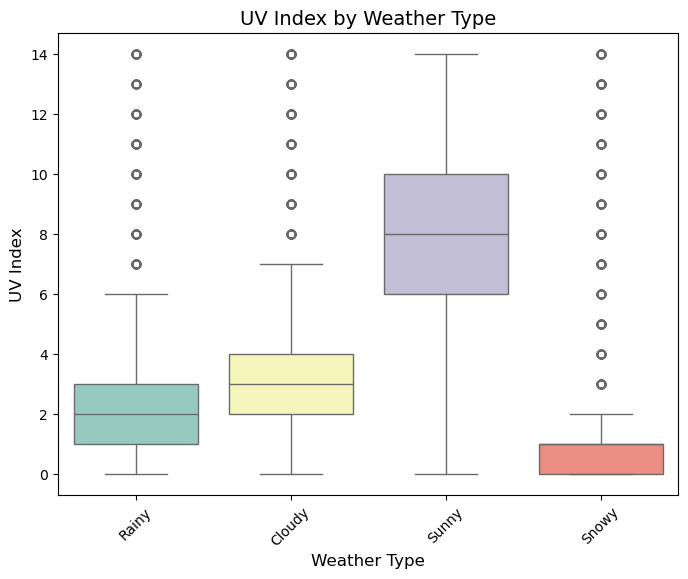

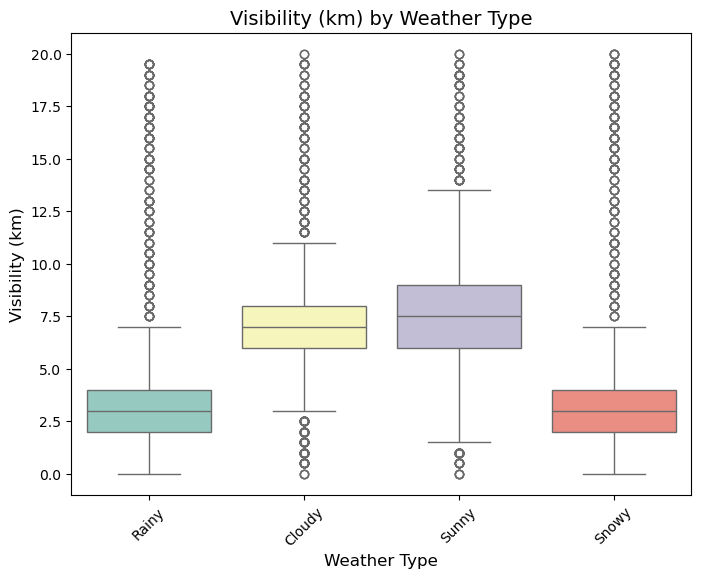

In [10]:
# Boxplots for Numerical Features vs Target
for feature in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=weather_data, x="Weather Type", y=feature, hue="Weather Type", palette="Set3", dodge=False)
    plt.title(f"{feature} by Weather Type", fontsize=14)
    plt.xlabel("Weather Type", fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

In [11]:
# Separate features and target variable
X = weather_data.drop(columns=['Weather Type'])  # Features
y = weather_data['Weather Type']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # Stratify ensures class balance in splits
)

# Verify the split
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Training samples: 10560
Testing samples: 2640


In [12]:
# Define Random Forest pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
rf_pipeline.fit(X_train, y_train)

# Predict and evaluate
rf_y_pred = rf_pipeline.predict(X_test)
print("Random Forest Classifier Results:")
print(f"Accuracy: {accuracy_score(y_test, rf_y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, rf_y_pred))


Random Forest Classifier Results:
Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

      Cloudy       0.87      0.93      0.90       660
       Rainy       0.90      0.91      0.90       660
       Snowy       0.95      0.91      0.93       660
       Sunny       0.94      0.91      0.93       660

    accuracy                           0.91      2640
   macro avg       0.92      0.91      0.91      2640
weighted avg       0.92      0.91      0.91      2640



<Figure size 800x600 with 0 Axes>

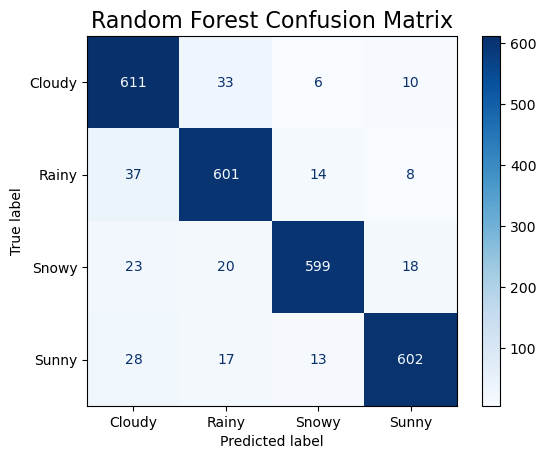

In [52]:
# Generate and plot the confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(rf_pipeline, X_test, y_test, 
                                       display_labels=['Cloudy', 'Rainy', 'Snowy', 'Sunny'], 
                                       cmap='Blues', values_format='d')
plt.title("Random Forest Confusion Matrix", fontsize=16)
plt.show()

In [14]:
# Define Logistic Regression pipeline
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Train the model
lr_pipeline.fit(X_train, y_train)

# Predict and evaluate
lr_y_pred = lr_pipeline.predict(X_test)
print("Logistic Regression Classifier Results:")
print(f"Accuracy: {accuracy_score(y_test, lr_y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, lr_y_pred))

Logistic Regression Classifier Results:
Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

      Cloudy       0.82      0.83      0.83       660
       Rainy       0.85      0.86      0.85       660
       Snowy       0.89      0.92      0.90       660
       Sunny       0.92      0.87      0.89       660

    accuracy                           0.87      2640
   macro avg       0.87      0.87      0.87      2640
weighted avg       0.87      0.87      0.87      2640



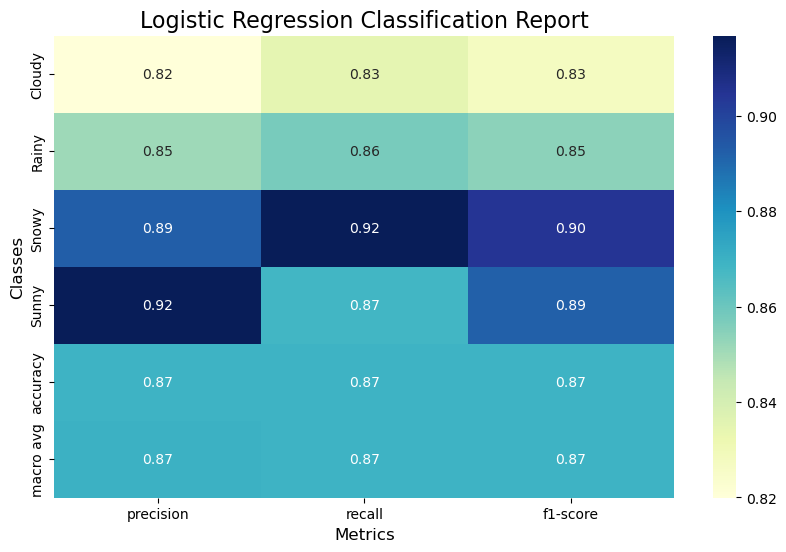

In [15]:
# Generate the classification report as a dictionary
lr_report = classification_report(y_test, lr_y_pred, output_dict=True)

# Convert to DataFrame for better visualization
lr_report_df = pd.DataFrame(lr_report).transpose()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(lr_report_df.iloc[:-1, :-1], annot=True, fmt='.2f', cmap='YlGnBu', cbar=True)
plt.title("Logistic Regression Classification Report", fontsize=16)
plt.xlabel("Metrics", fontsize=12)
plt.ylabel("Classes", fontsize=12)
plt.show()

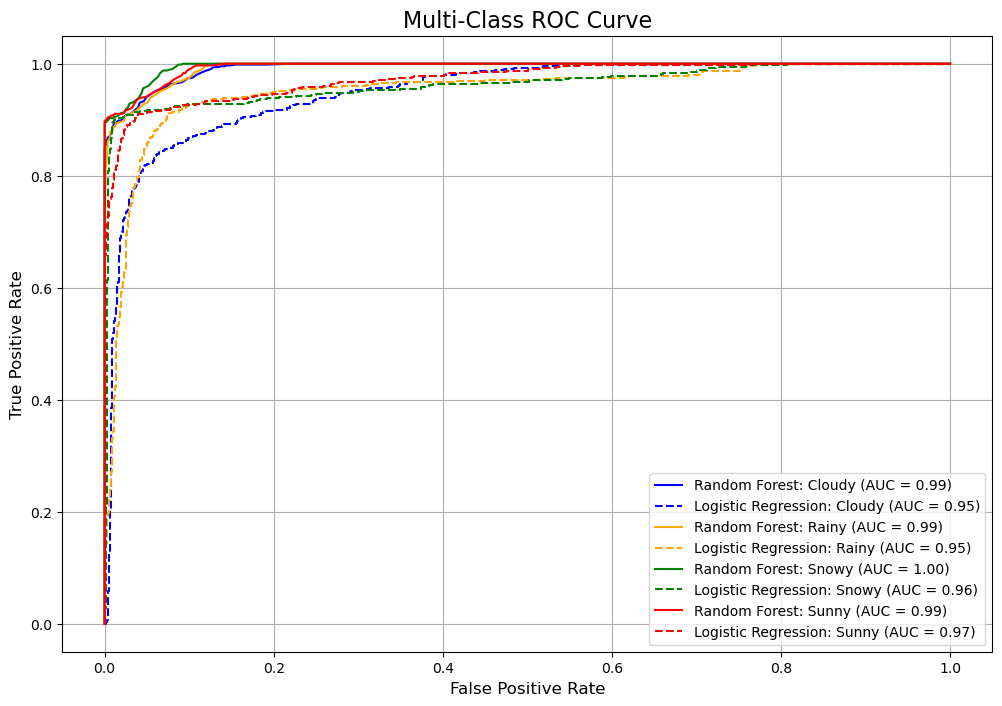

In [16]:
# Binarize the target variable for multi-class ROC curves
y_test_binarized = label_binarize(y_test, classes=['Cloudy', 'Rainy', 'Snowy', 'Sunny'])

# Get the predicted probabilities for each model
rf_probabilities = rf_pipeline.predict_proba(X_test)
lr_probabilities = lr_pipeline.predict_proba(X_test)

# Plot the multi-class ROC curves
plt.figure(figsize=(12, 8))

# Colors for each class
colors = ['blue', 'orange', 'green', 'red']

for i, class_name in enumerate(['Cloudy', 'Rainy', 'Snowy', 'Sunny']):
    # Random Forest
    rf_fpr, rf_tpr, _ = roc_curve(y_test_binarized[:, i], rf_probabilities[:, i])
    rf_auc = auc(rf_fpr, rf_tpr)
    plt.plot(rf_fpr, rf_tpr, color=colors[i], linestyle='-', label=f'Random Forest: {class_name} (AUC = {rf_auc:.2f})')
    
    # Logistic Regression
    lr_fpr, lr_tpr, _ = roc_curve(y_test_binarized[:, i], lr_probabilities[:, i])
    lr_auc = auc(lr_fpr, lr_tpr)
    plt.plot(lr_fpr, lr_tpr, color=colors[i], linestyle='--', label=f'Logistic Regression: {class_name} (AUC = {lr_auc:.2f})')

plt.title("Multi-Class ROC Curve", fontsize=16)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="lower right", fontsize=10)
plt.grid()
plt.show()

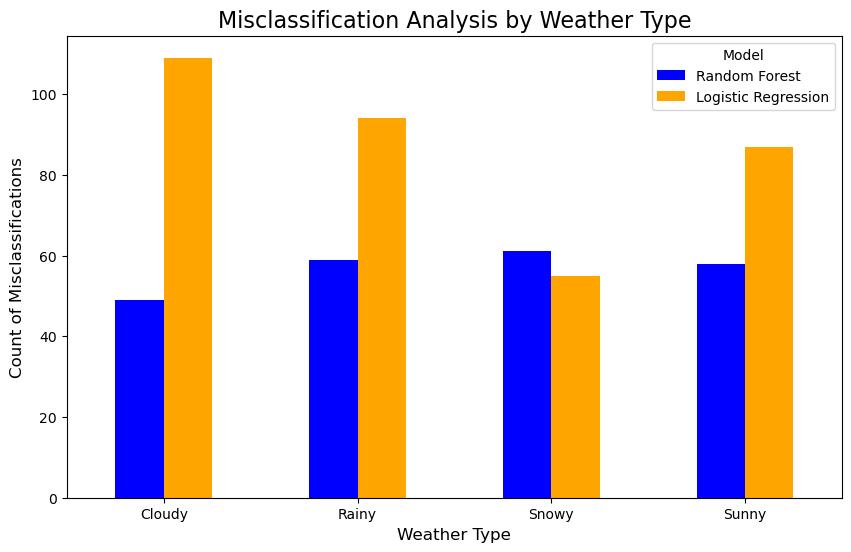

In [17]:
# Misclassification counts for Random Forest
rf_misclassified = (y_test != rf_y_pred).groupby(y_test).sum()

# Misclassification counts for Logistic Regression
lr_misclassified = (y_test != lr_y_pred).groupby(y_test).sum()

# Combine into a DataFrame
misclassification_df = pd.DataFrame({
    'Random Forest': rf_misclassified,
    'Logistic Regression': lr_misclassified
})

# Plot misclassifications
misclassification_df.plot(kind='bar', figsize=(10, 6), color=['blue', 'orange'])
plt.title("Misclassification Analysis by Weather Type", fontsize=16)
plt.xlabel("Weather Type", fontsize=12)
plt.ylabel("Count of Misclassifications", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Model")
plt.show()

C:\Users\kylew\AppData\Local\Temp\ipykernel_5884\3858913001.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances_df, x='Importance', y='Feature', palette='viridis')


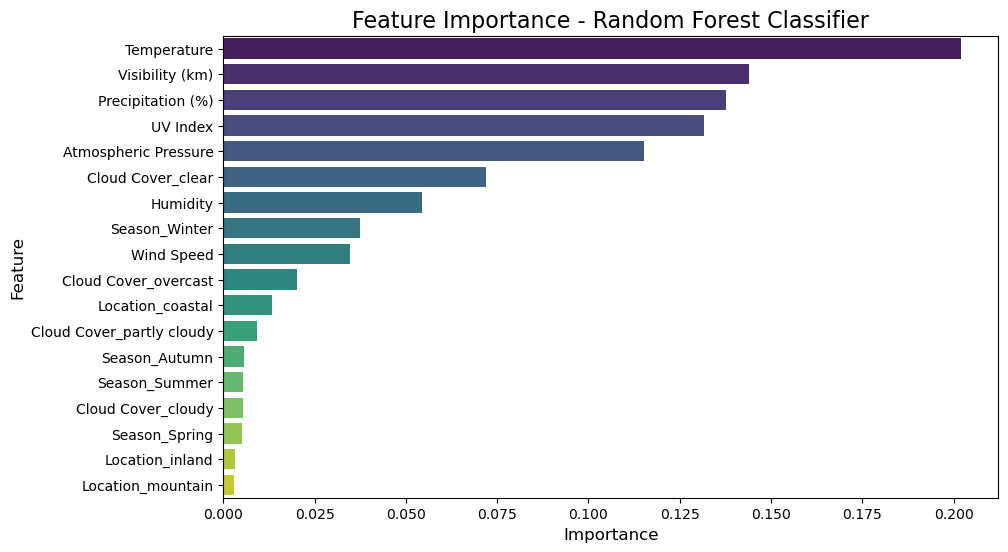

In [18]:
# Extract feature importances from Random Forest
feature_importances = rf_pipeline.named_steps['classifier'].feature_importances_

# Combine numerical and categorical feature names
num_features = preprocessor.named_transformers_['num'].get_feature_names_out()
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out()
all_features = list(num_features) + list(cat_features)

# Combine into a DataFrame
importances_df = pd.DataFrame({'Feature': all_features, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=importances_df, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance - Random Forest Classifier", fontsize=16)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.show()